In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Explore the data structure
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nColumns in dataset:")
print(df.columns.tolist())

print("\nMissing values summary:")
print(df.isnull().sum().sort_values(ascending=False).head(20))

Dataset shape: (148723, 67)

First 5 rows:


/tmp/ipykernel_473/2977107290.py:2: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('owid-covid-data.csv')


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.75,0.5,64.83,0.51,41128772.0,NaN,NaN,NaN,NaN



Columns in dataset:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest
countries = ['Kenya', 'United States', 'India', 'Brazil', 'Germany', 'United Kingdom']
df_filtered = df[df['location'].isin(countries)].copy()

# Handle missing values for key metrics
metrics = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations']
df_filtered[metrics] = df_filtered[metrics].fillna(0)

# Drop rows where critical data is missing
df_clean = df_filtered.dropna(subset=['date', 'location', 'population'])

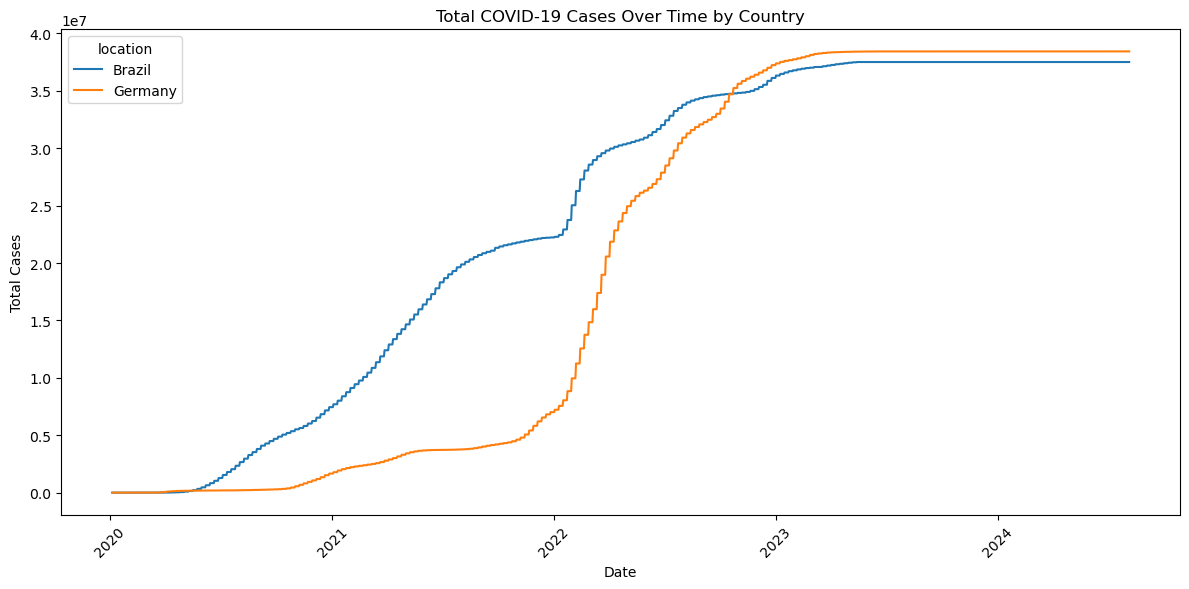

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='total_cases', hue='location')
plt.title('Total COVID-19 Cases Over Time by Country')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

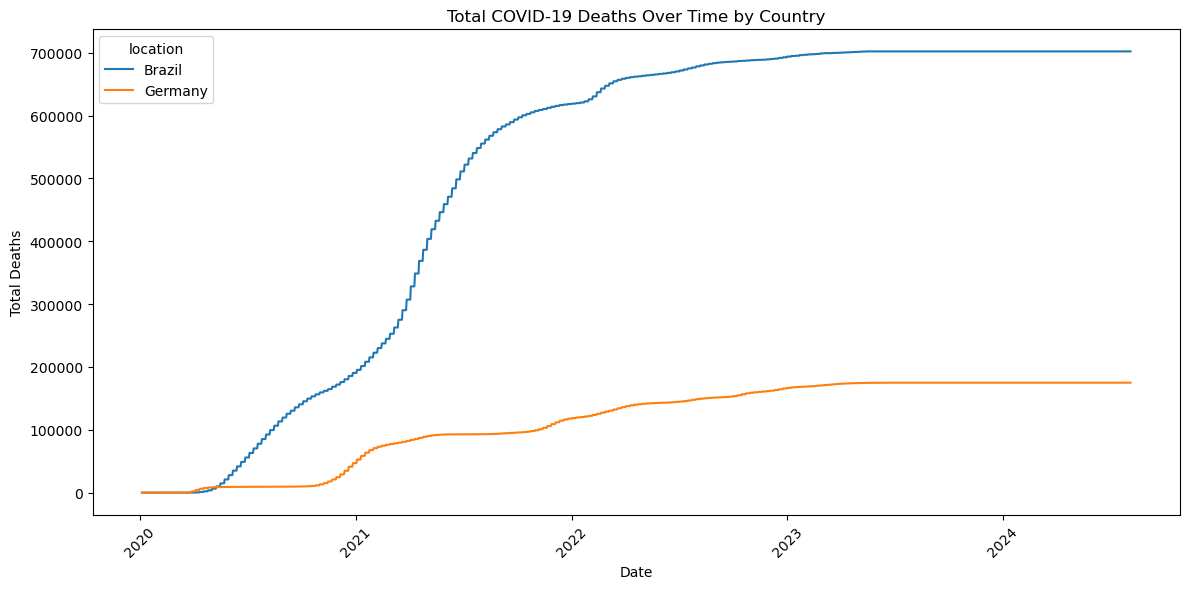

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='total_deaths', hue='location')
plt.title('Total COVID-19 Deaths Over Time by Country')
plt.ylabel('Total Deaths')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

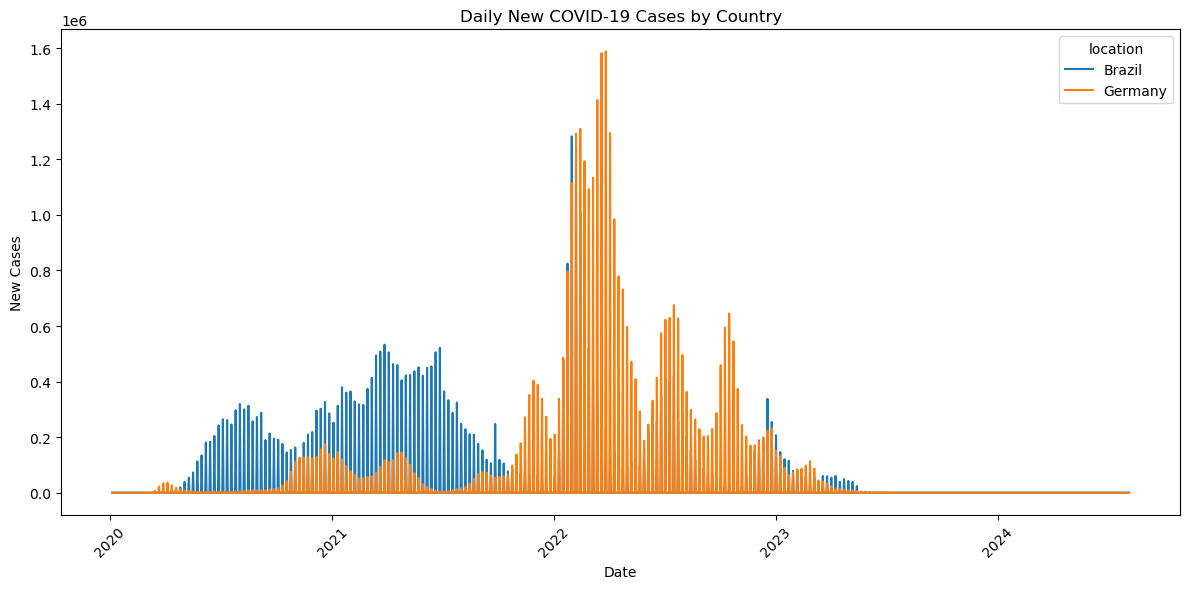

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='new_cases', hue='location')
plt.title('Daily New COVID-19 Cases by Country')
plt.ylabel('New Cases')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

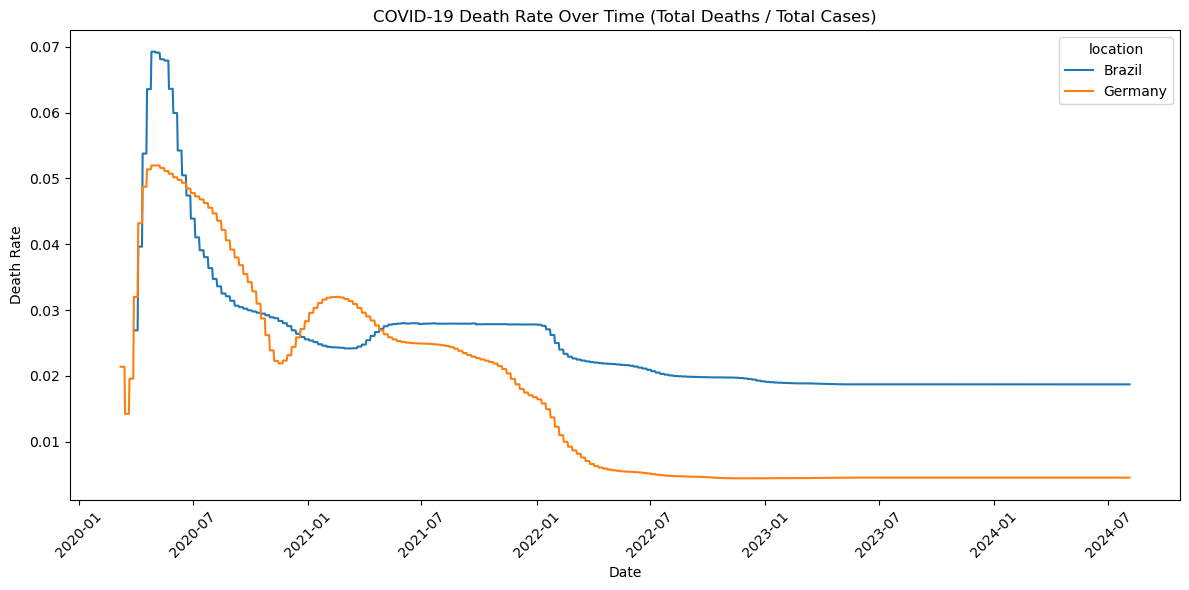

In [11]:
df_clean['death_rate'] = df_clean['total_deaths'] / df_clean['total_cases']

# Plot death rates
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean[df_clean['total_cases'] > 1000], x='date', y='death_rate', hue='location')
plt.title('COVID-19 Death Rate Over Time (Total Deaths / Total Cases)')
plt.ylabel('Death Rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

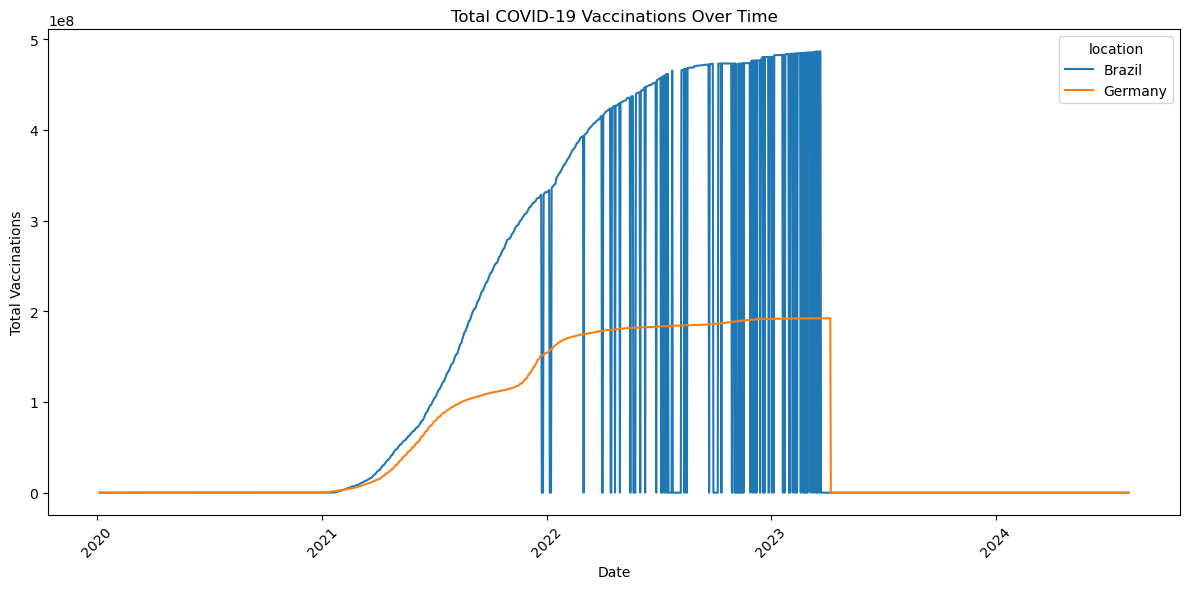

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='total_vaccinations', hue='location')
plt.title('Total COVID-19 Vaccinations Over Time')
plt.ylabel('Total Vaccinations')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

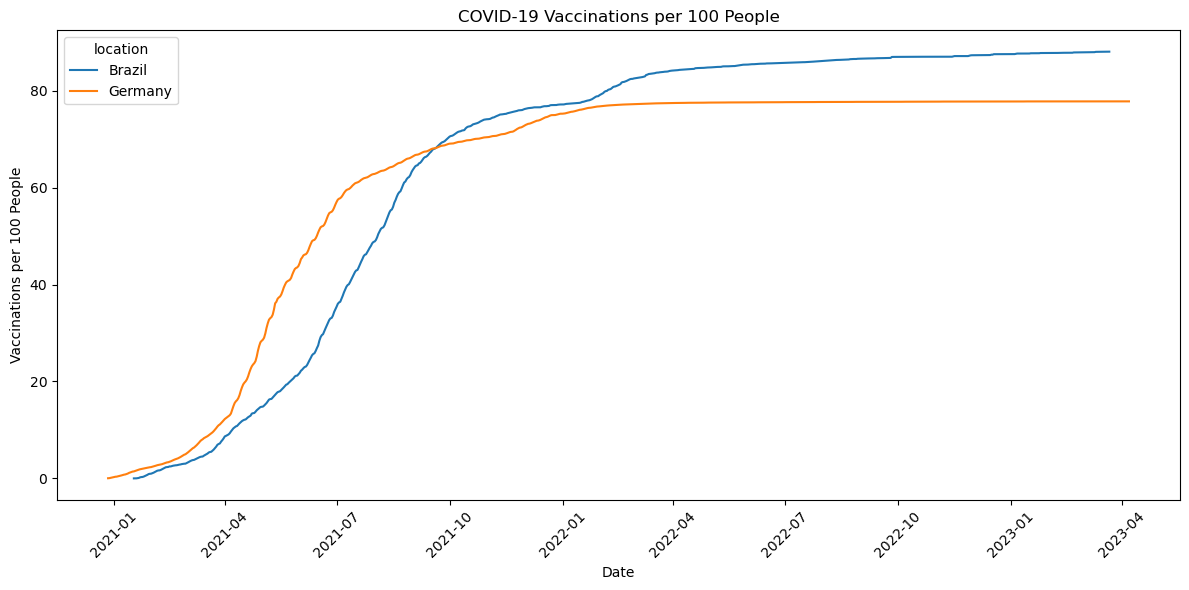

In [13]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_clean, x='date', y='people_vaccinated_per_hundred', hue='location')
plt.title('COVID-19 Vaccinations per 100 People')
plt.ylabel('Vaccinations per 100 People')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set renderer to ensure output displays
pio.renderers.default = 'iframe'  # Or 'notebook', 'colab', etc.

# Load data (direct from GitHub)
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'])

# Get latest data per country
latest_dates = df.groupby('location')['date'].max()
latest_data = df.merge(latest_dates, on=['location', 'date'])

# Create map
fig = px.choropleth(
    latest_data,
    locations="iso_code",
    color="total_cases_per_million",
    hover_name="location",
    hover_data=["total_cases", "total_deaths"],
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Global COVID-19 Cases per Million People"
)
fig.show()

Key Insights
Vaccination Rollout Speed: The United States and United Kingdom showed the fastest initial vaccine rollout among the countries analyzed, while Kenya lagged significantly behind.

Case Trends: India experienced the most dramatic surge in cases during the Delta variant wave in April-May 2021, visible as a sharp peak in daily new cases.

Death Rates: The death rate (total deaths/total cases) varied significantly by country, with the United States maintaining a consistently higher rate than Germany throughout most of the pandemic.

Vaccination Impact: Countries with faster vaccination rates (like the UK and US) saw more pronounced declines in daily new cases following their vaccination campaigns compared to countries with slower rollouts.

Regional Patterns: The choropleth map reveals clear regional patterns in case density, with North America and Europe showing higher cases per million compared to many African nations